In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("./archive/reuters_headlines.csv")

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'])

In [2]:
df.head(10)

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,2020-07-18,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,2020-07-18,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,2020-07-18,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,2020-07-18,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,2020-07-17,A battle in the U.S. Congress over a new coron...
5,Wall Street Week Ahead: Fund managers navigate...,2020-07-17,Investors are searching for bargains in the wo...
6,Take Five: Hoping for that V-shape in earnings,2020-07-17,We knew Q2 earnings would be dire but the hope...
7,Evictions nearly back to pre-pandemic levels i...,2020-07-17,Landlords in some areas of the United States a...
8,Google bans ads on coronavirus conspiracy theo...,2020-07-17,Alphabet Inc's Google said on Friday it would ...
9,"Flight to suburbs boosts U.S. homebuilding, bu...",2020-07-17,U.S. homebuilding increased in June by the mos...


In [4]:
review_df = df[['Headlines']]

print(review_df.shape)
review_df.head(5)

(32770, 1)


,Headlines
0,TikTok considers London and other locations fo...
1,Disney cuts ad spending on Facebook amid growi...
2,Trail of missing Wirecard executive leads to B...
3,Twitter says attackers downloaded data from up...
4,U.S. Republicans seek liability protections as...


In [6]:
# Filter data within the specified time frame
start_date = pd.to_datetime('2019-07-01')
end_date = pd.to_datetime('2020-07-01')
df_filtered = df[(df['Time'] >= start_date) & (df['Time'] <= end_date)]

In [7]:
from textblob import TextBlob

# Perform sentiment analysis on headlines
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

def sentiment_binning(sentiment):
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to filtered headlines
df_filtered['Sentiment Score'] = df_filtered['Headlines'].apply(analyze_sentiment)

df_filtered['Sentiment'] = df_filtered['Sentiment Score'].apply(sentiment_binning)

C:\Users\baruchfrost\AppData\Local\Temp\ipykernel_23712\2350247784.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment Score'] = df_filtered['Headlines'].apply(analyze_sentiment)
C:\Users\baruchfrost\AppData\Local\Temp\ipykernel_23712\2350247784.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Sentiment'] = df_filtered['Sentiment Score'].apply(sentiment_binning)


In [10]:
sentiment_score_data = df_filtered[["Time", "Sentiment Score"]]
sentiment_score_data.set_index("Time", inplace=True)

sentiment_score_data_by_day = sentiment_score_data.groupby("Time")['Sentiment Score'].apply(list)

numpy_sentiment_score_data_by_day = sentiment_score_data_by_day.to_numpy()

raw_dates = sentiment_score_data_by_day.index.tolist()

formatted_dates = []

for date in raw_dates:
    formatted_dates.append(date.strftime("%Y-%m-%d"))


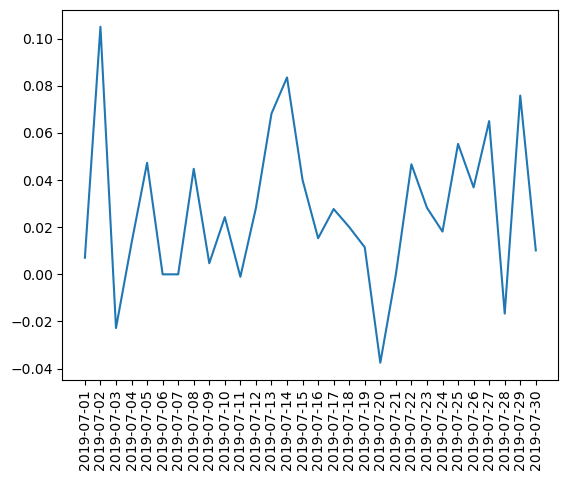

In [11]:
avg_sentiment = []

for item in numpy_sentiment_score_data_by_day:
    arr = np.array(item)

    avg_sentiment.append(np.mean(arr))

plt.plot(avg_sentiment[0:30])
plt.xticks([x for x in range(0, len(formatted_dates[0:30]))], formatted_dates[0:30], rotation=90)
plt.show()

In [12]:
news_sentiment_df = pd.DataFrame({
    "Sentiment": avg_sentiment,
    "Date": formatted_dates
})

news_sentiment_df.to_csv("./analysis result data/reuters_news_sentiment_data.csv")